In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [59]:
#Primeiro vamos importar o dataset
df = pd.read_csv("/Users/gabrielrodrigues/Desktop/Python_projects/DB_csv/Spam_Email_Classification.csv")

#Definir a visualização de todas as colunas
pd.set_option("display.max_columns", None)

In [60]:
#Gosto sempre de começar a tratativa dos dados olhando os 5 primeiros indices para ter uma ideia de como está estruturada a tabela

#Lembrando que de acordo com a documentação fornecida pelo Kaggle
#0 = HAM
#1 = SPAM

df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [61]:
#Vamos verificar o as colunas, seus tipos e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [62]:
#Definindo as duas features, sendo X nossa base para treino, e y a feature alvo, a qual queremos predizer os resultados

X = df["text"]
y = df["label"]

#Aplicar o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
#Vamos utilizar a função TfidfVectorizer para vetorizarmos as strings em pontos no gráfico
feature_extraction = TfidfVectorizer(stop_words="english")

#Transformar nossas base treino e base teste em vetores
X_train_vectorized = feature_extraction.fit_transform(X_train)
X_test_vectorized = feature_extraction.transform(X_test)

In [64]:
#Iremos utilizar o modelo de Regressão logística para a predição dos valores
modelo = LogisticRegression(random_state = 1)

modelo.fit(X_train_vectorized, y_train)

LogisticRegression(random_state=1)

In [65]:
#modelo.fit(X_test_vectorized, y_test)
y_test_pred = modelo.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.9832234871180348

In [66]:
#Tivemos uma precisão quase perfeita ao identificar corretamente os verdadeiros positivos da categoria SPAM

#Tivemos também um recall muito bom para a categoria HAM (identificação correta de valores em razão de todos os valores corretos) 

#E um F1-Score, que nada mais é do que a média harmonica entre as duas primeiras métricas, muito bom também

class_report = classification_report(y_test, y_test_pred)

print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7916
           1       0.98      0.99      0.98      8774

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



In [67]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

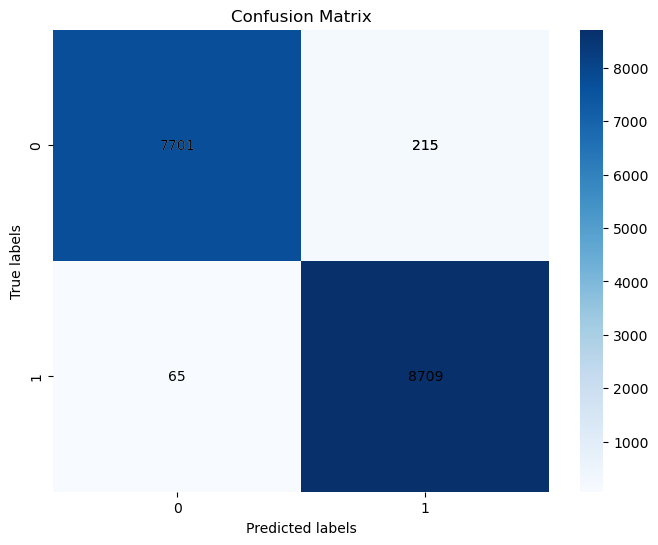

In [68]:
#Agora iremos plotar um gráfico de Matriz de Confusão para observarmos melhor as pontuações do nosso modelo.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

#Especificar manualmente as posições das anotações, pois há umm problema com as mesmas

#Caso não esteja enfrentando o problema com as anotações, pode desconsiderar o código abaixo
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j+0.5, i+0.5, str(conf_matrix[i, j]), ha='center', va='center', fontsize=10)


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

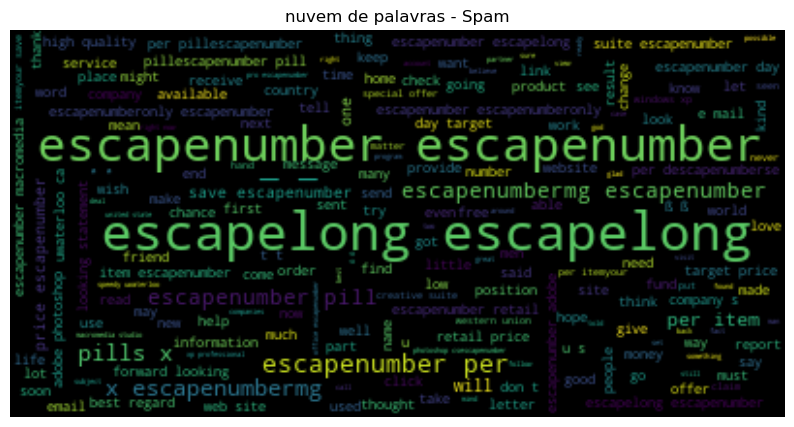

In [72]:
#converte os valores da coluna 'text' (quando SPAM) em uma única string, onde os valores são concatenados com um espaço entre eles
corpo_spam = ' '.join(df[df['label'] == 1]['text'])
wordcloud = WordCloud().generate(corpo_spam)

#Vamos plotar um gráfico de nuvem de palavras com as palavras recorrentes em E-mails SPAM
plt.figure(figsize=(10,6)) 
plt.title('nuvem de palavras - Spam')
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")

In [83]:
#Iremos utilizar o método CountVectorizer para converter nossas matriz, em uma matrz de contagem
vectorizer = CountVectorizer(stop_words='english')

spam_vectorized = vectorizer.fit_transform(df[df['label'] == 1]['text'])

#Retorna uma lista com todas as palavras (ou tokens) no vocabulário
vocab = vectorizer.get_feature_names_out()

#Criando um array com os valores ordenados e cada indice possuindo sua contagem da matriz: spam_vectorized
palavras_mais_comuns = sorted(list(zip(vocab, spam_vectorized.sum(axis=0).getA1())), key=lambda x: x[1], reverse=True)[:10]

for palavra in palavras_mais_comuns:
    print(f"{palavra[0]}\nOcorrências: {palavra[1]}\n")

escapenumber
Ocorrências: 336346

escapelong
Ocorrências: 188127

com
Ocorrências: 29026

http
Ocorrências: 27757

pills
Ocorrências: 23128

escapenumbermg
Ocorrências: 20541

price
Ocorrências: 18724

company
Ocorrências: 16590

save
Ocorrências: 15007

item
Ocorrências: 14473

